In [1]:
# Fetch Open ML Dataset: 784 pixels (28 x 28)
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [2]:
import numpy as np

print(X.shape, y.shape)
print(np.min(X), np.max(X))
print(y[0:5])

(70000, 784) (70000,)
0 255
0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [3]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
  hidden_layer_sizes = (6,),    # The number of neurons in the hidden layer
  max_iter = 200,               # The solver iterates until convergence or this number of iterations
  alpha = 1e-4,                 # loss += l2_regularization_term / sample_size
  solver = 'sgd',               # The solver for weight optimization
  random_state = 2)             # Determines random number generation for weights and bias initialization

mlp.fit(X, y)

MLPClassifier(hidden_layer_sizes=(6,), random_state=2, solver='sgd')

In [4]:
n_input_values, n_hidden_nodes = mlp.coefs_[0].shape
n_input_values, n_hidden_nodes

(784, 6)

In [5]:
n_hidden_nodes, n_output_values = mlp.coefs_[1].shape
n_hidden_nodes, n_output_values

(6, 10)

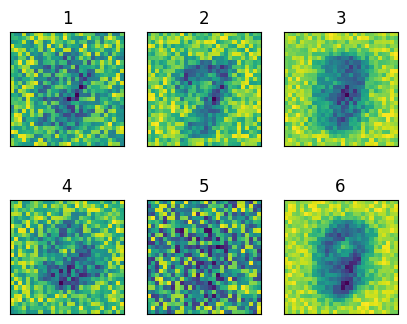

In [6]:
# Visualizing the Hidden Layer
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(5, 4))

for i, ax in enumerate(axes.ravel()):
    coef = mlp.coefs_[0][:, i]
    ax.matshow(coef.reshape(28, 28))
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(i + 1)

plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

mlp.score(X_test, y_test)

0.11068571428571429

In [8]:
X_test.shape

(17500, 784)

['1']


/Users/camerongallichan/Workspace/Python/Playground/__pyenv__/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


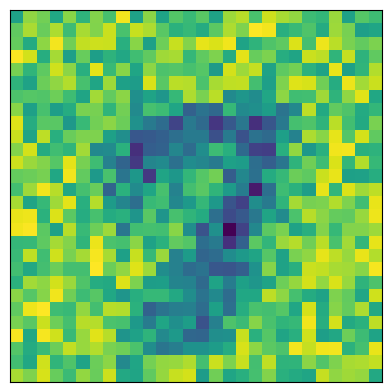

In [9]:
# Test Individually
x = mlp.coefs_[0][:, 1]
print(mlp.predict([x]))

plt.matshow(x.reshape(28, 28))
plt.xticks(())
plt.yticks(())
plt.show()